<a href="https://colab.research.google.com/github/Ridzan12/bluechipstock/blob/main/Top_4_Indonesia_Bluechip_Stock_Analysis_Using_LSTM_%2B_ARIMA_Time_Series_Forecasting_Muhammad_Ridzan_Pahmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Top 4 Bluechip Stock in Indonesia**
- PT Bank Central Asia Tbk (BBCA.JK) https://finance.yahoo.com/quote/BBCA.JK/
- PT Telekomunikasi Indonesia Tbk (TLKM.JK) https://finance.yahoo.com/quote/TLKM.JK/
- PT Indofood CBP Sukses Makmur Tbk (ICBP.JK) https://finance.yahoo.com/quote/ICBP.JK/
- PT Astra International Tbk (ASII.JK) https://finance.yahoo.com/quote/ASII.JK/

These four stocks have a strong influence on development IHSG or the Indonesian stock market. So it is necessary to analyze more deeply using LSTM and ARIMA time series forecasting.





Long Short Term Memory (**LSTM**) Method. Specifically designed to process sequence data. The analysis results show that the system can predict stock prices with the highest prediction accuracy rate of 99%

Autoregressive integrated moving average (**ARIMA**) models predict future values based on past values. ARIMA makes use of lagged moving averages to smooth time series data.

## To Analyze

**LSTM**
- Closing Price
- ROI
- Sales Volume
- Moving Average
- Daily Return
- Correlation Between Stocks Closing Prices

**ARIMA**
- Predict Stock Price Using ARIMA/SARIMA

# LSTM

In [348]:
!git clone https://github.com/Ridzan12/bluechipstock.git

fatal: destination path 'bluechipstock' already exists and is not an empty directory.


In [349]:
# The library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from datetime import date, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose

In [350]:
# 4 Bluechip stocks in indonesia.
tech_list = ['BBCA.JK',
             'TLKM.JK',
             'ICBP.JK',
             'ASII.JK'
             ]

# Set up End and Start time.
tech_list = ['BBCA.JK',
             'TLKM.JK',
             'ICBP.JK',
             'ASII.JK'
             ]

end = datetime.now()

# Set the Start time from 2022.
start = datetime(2022, 1, 1)

# Download from yfinance DataFrames for each stock.
BBCA = yf.download('BBCA.JK', start, end)
TLKM = yf.download('TLKM.JK', start, end)
ICBP = yf.download('ICBP.JK', start, end)
ASII = yf.download('ASII.JK', start, end)

# Create a list of DataFrames and corresponding company names.
company_list = [BBCA, TLKM, ICBP, ASII]
company_name = ["BCA", "TELKOM", "INDOFOOD", "ASTRA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [351]:
stk = pd.concat(company_list, axis=0)
stk.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-26,6225.0,6300.0,6200.0,6200.0,6200.0,43217400,ASTRA
2023-09-27,6200.0,6250.0,6125.0,6150.0,6150.0,31688400,ASTRA
2023-09-29,6250.0,6275.0,6200.0,6225.0,6225.0,20902300,ASTRA
2023-10-02,6275.0,6350.0,6250.0,6275.0,6275.0,23884400,ASTRA
2023-10-03,6275.0,6275.0,6200.0,6200.0,6200.0,25350100,ASTRA


In [352]:
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424 entries, 2022-01-03 to 2023-10-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          424 non-null    float64
 1   High          424 non-null    float64
 2   Low           424 non-null    float64
 3   Close         424 non-null    float64
 4   Adj Close     424 non-null    float64
 5   Volume        424 non-null    int64  
 6   company_name  424 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 26.5+ KB


## Closing Price

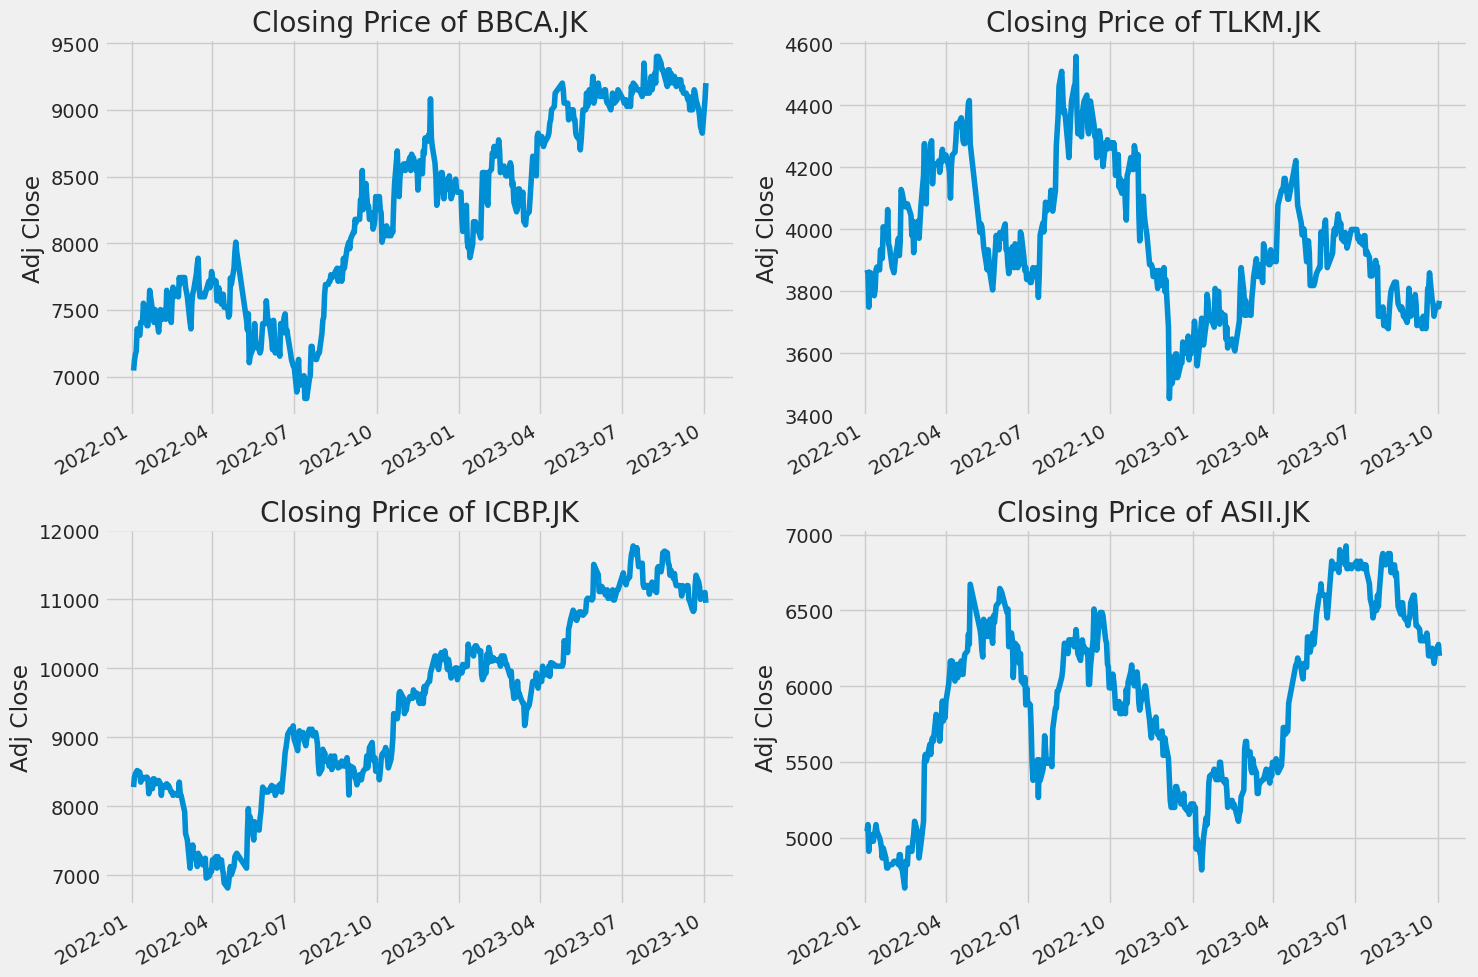

In [353]:
# Create closing price line chart.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

**Insights :** Closing prices of BCA, INDOFOOD, and ASTRA stocks have increased from 2022. This shows the growth in stock value over the 2022 period. While TELKOM stock have decreased.

## ROI (Return On Investement)

In [385]:
# Calculate ROI for each stock.
for company, com_name in zip(company_list, company_name):
    initial_price = company.iloc[0]['Adj Close']
    final_price = company.iloc[-1]['Adj Close']

    # Calculate ROI.
    roi = ((final_price - initial_price) / initial_price) * 100
    print(f"ROI for {com_name}: {roi:.2f}%")

ROI for BCA: 30.58%
ROI for TELKOM: -2.58%
ROI for INDOFOOD: 32.28%
ROI for ASTRA: 22.95%


**Insights :** ROI BCA, INDOFOOD, AND ASTRA has high capital gain from 2022. while TELKOM has decreased

## Sales Volume

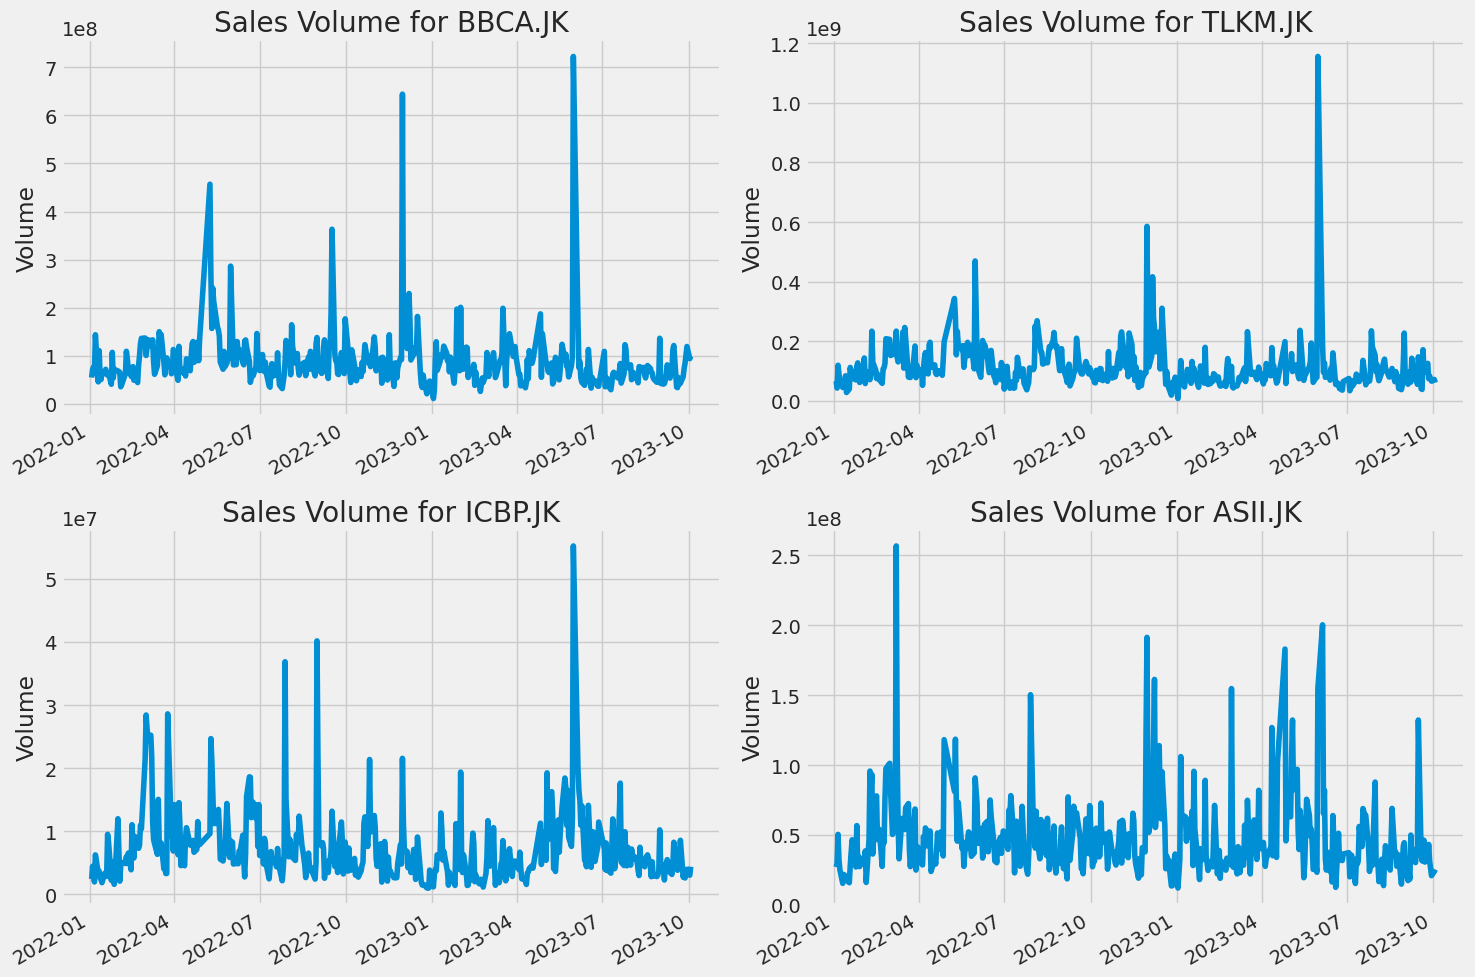

In [355]:
# Create sales volume plot.
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

**Insight :** High sales volume can affect stock price moving average so that the stock price falls.
ex: in August 2023, the sales volume was high, causing the stock to fall at a certain price.

## Moving Average

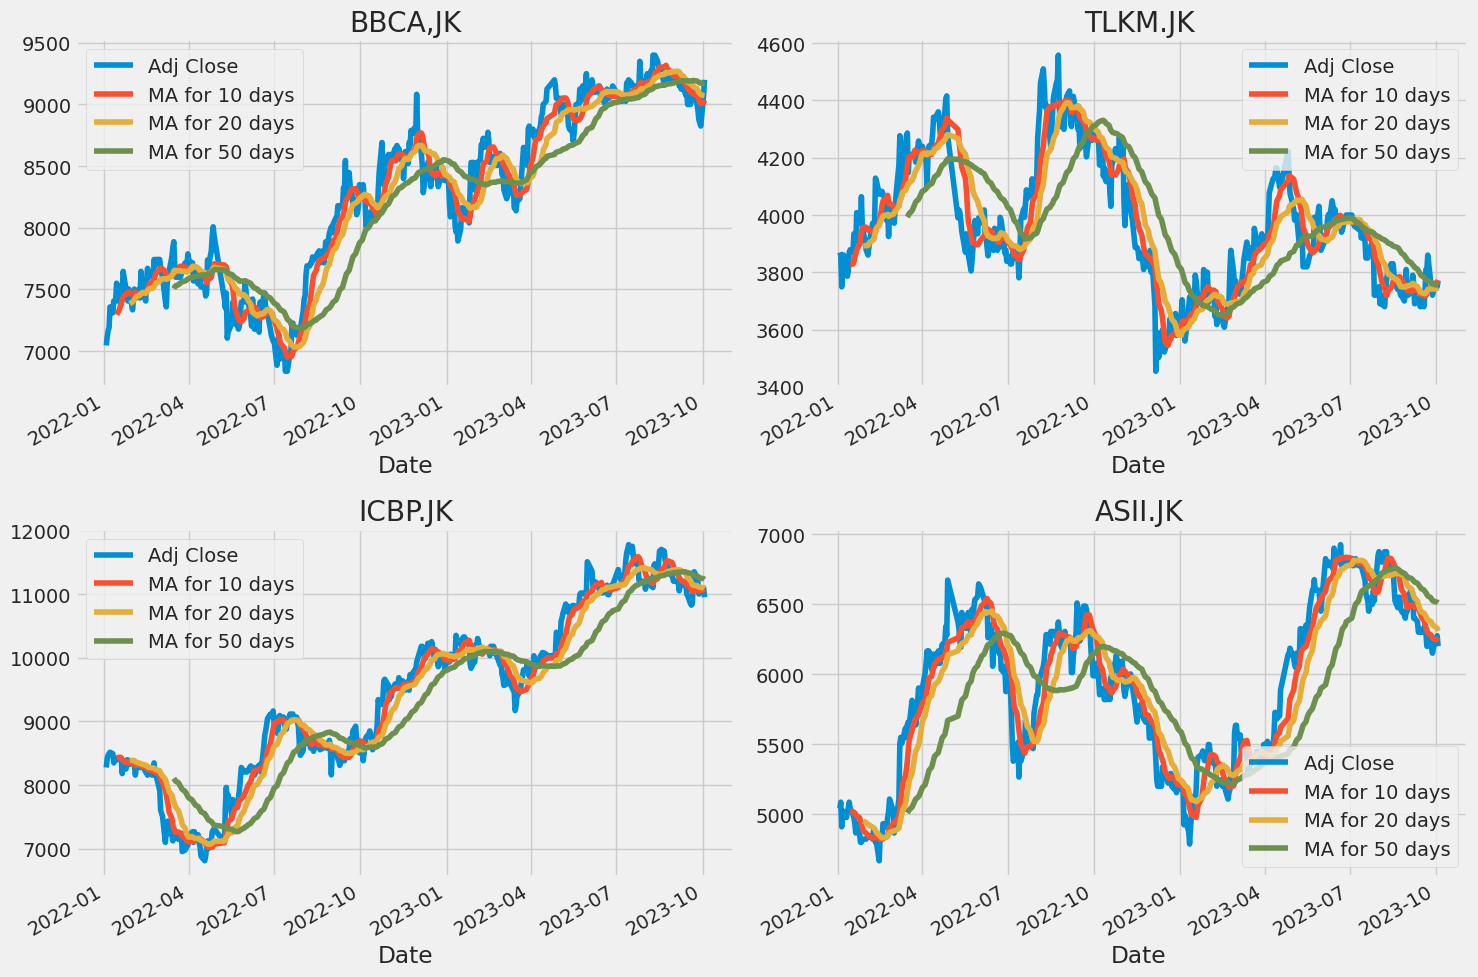

In [356]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBCA[['Adj Close',
      'MA for 10 days',
      'MA for 20 days',
      'MA for 50 days'
      ]].plot(ax=axes[0,0])

axes[0,0].set_title('BBCA,JK')

TLKM[['Adj Close',
      'MA for 10 days',
      'MA for 20 days',
      'MA for 50 days'
      ]].plot(ax=axes[0,1])

axes[0,1].set_title('TLKM.JK')

ICBP[['Adj Close',
      'MA for 10 days',
      'MA for 20 days',
      'MA for 50 days'
      ]].plot(ax=axes[1,0])

axes[1,0].set_title('ICBP.JK')

ASII[['Adj Close',
      'MA for 10 days',
      'MA for 20 days',
      'MA for 50 days'
      ]].plot(ax=axes[1,1])

axes[1,1].set_title('ASII.JK')

fig.tight_layout()

In [357]:
# Create bullish number calculations.
bullish_count_ma50 = {"BCA": 0,
                      "TELKOM": 0,
                      "INDOFOOD": 0,
                      "ASTRA": 0
                     }

# Loop through the stock data.
for company, com_name in zip(company_list, company_name):
    ma50_column_name = f"MA for 50 days"
    company[ma50_column_name] = company['Adj Close'
    ].rolling(window=50).mean()


    for i in range(50, len(company)):
        if company['Adj Close'][i] > company[ma50_column_name][i]:
            bullish_count_ma50[com_name] += 1

# Results for the bullish condition with MA50.
for com_name, count in bullish_count_ma50.items():
    print(f"{com_name} : {count} Bullish")


BCA : 245 Bullish
TELKOM : 161 Bullish
INDOFOOD : 242 Bullish
ASTRA : 209 Bullish


**Insights :** Seen from the moving average for 50 days, it can be seen when the trend movement is bullish or bearish. So far BCA and INDOFOOD has the most bullish trend, suitable for long-term investment.

## Daily Return

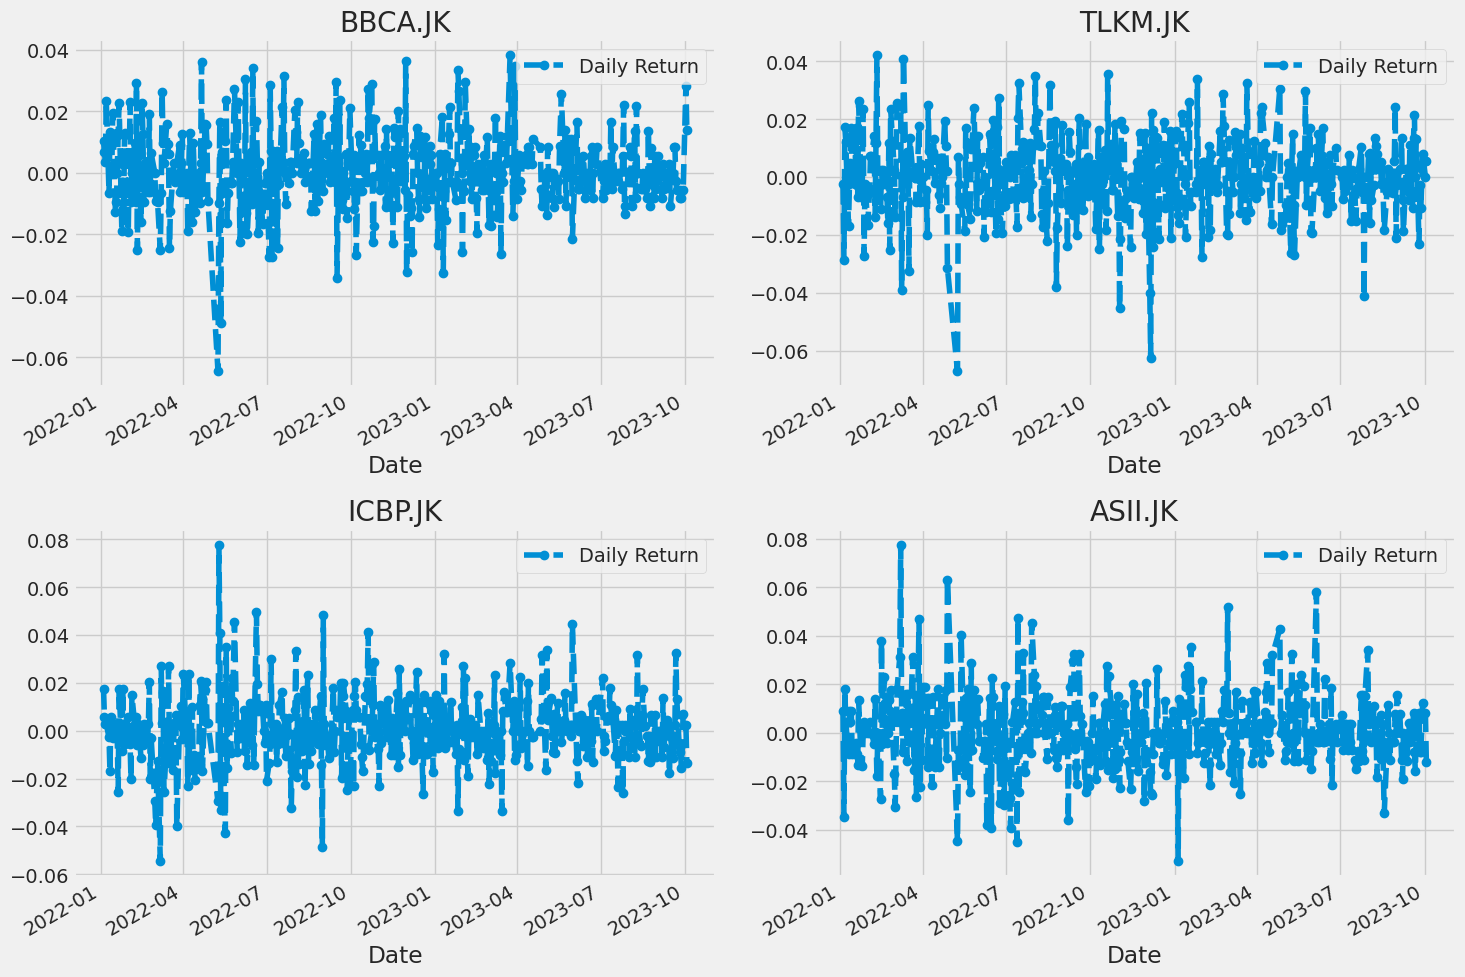

In [358]:
# Use pct_change to find the percent change for each day.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Daily return plot.
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

BBCA['Daily Return'].plot(ax=axes[0,0],
                          legend=True, linestyle='--', marker='o')
axes[0,0].set_title('BBCA.JK')

TLKM['Daily Return'].plot(ax=axes[0,1],
                          legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TLKM.JK')

ICBP['Daily Return'].plot(ax=axes[1,0],
                          legend=True, linestyle='--', marker='o')
axes[1,0].set_title('ICBP.JK')

ASII['Daily Return'].plot(ax=axes[1,1],
                          legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ASII.JK')

fig.tight_layout()

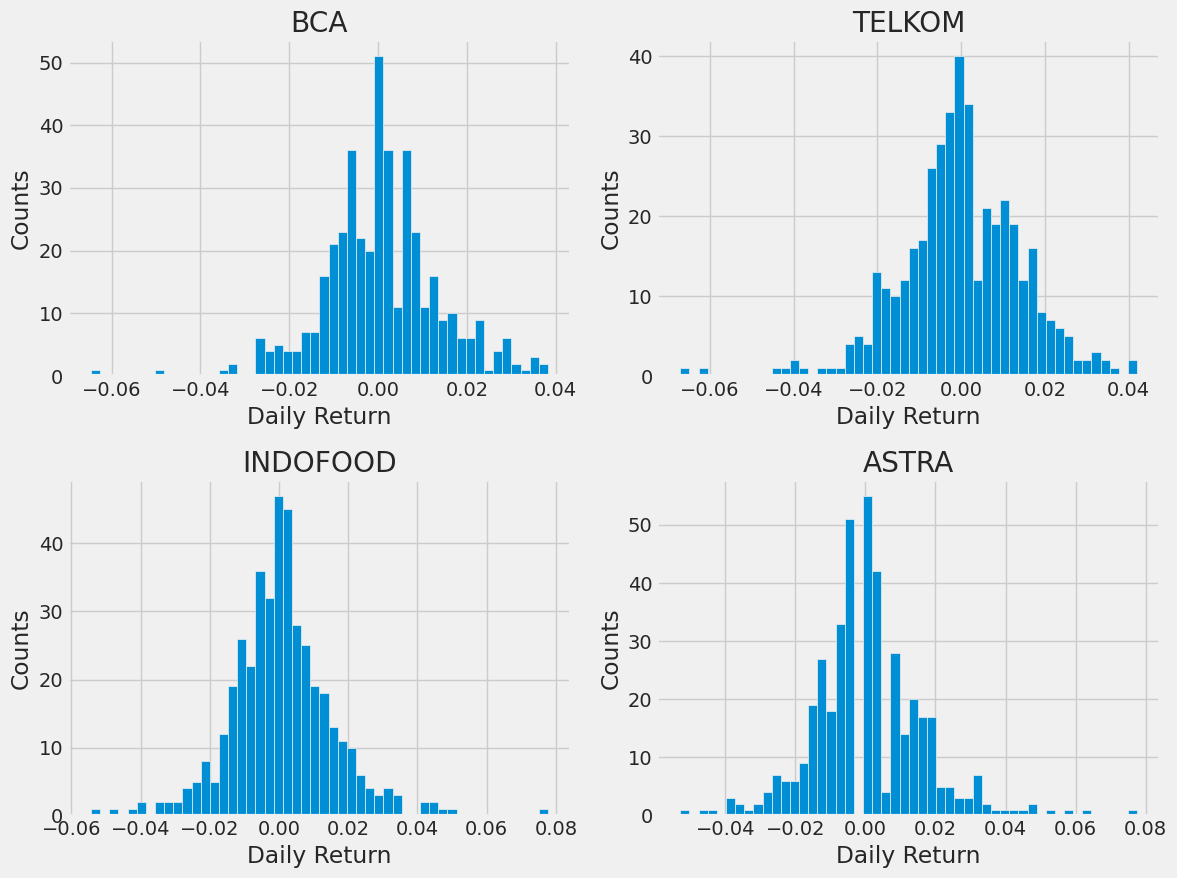

In [359]:
# Create histogram to find standard deviation.
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [360]:
# Calculate the standard deviation for each stock.
std_dev_BBCA = BBCA['Daily Return'].std()
std_dev_TLKM = TLKM['Daily Return'].std()
std_dev_ICBP = ICBP['Daily Return'].std()
std_dev_ASII = ASII['Daily Return'].std()

# Print the result.
print(f"standard deviation BCA: {std_dev_BBCA:.4f}")
print(f"standard deviation TELKOM: {std_dev_TLKM:.4f}")
print(f"standard deviation INDOFOOD: {std_dev_ICBP:.4f}")
print(f"standard deviation ASTRA: {std_dev_ASII:.4f}")

standard deviation BCA: 0.0131
standard deviation TELKOM: 0.0145
standard deviation INDOFOOD: 0.0148
standard deviation ASTRA: 0.0162


**Insight :** The average standard deviation of the histogram above is 0.01465. This indicates that the four stocks has low daily volatility, safe and stable for long-term investment.

## Correlation Between Stocks Closing Prices

In [361]:
# get the Dataframe from yfinance.
closing_stk = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Create a new stock returns DataFrame.
stk_rets = closing_stk.pct_change()
stk_rets.head()

[*********************100%%**********************]  4 of 4 completed


,ASII.JK,BBCA.JK,ICBP.JK,TLKM.JK
Date,,,,
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,0.008734,0.010239,0.017391,-0.002392
2022-01-05,-0.034632,0.006757,0.005698,-0.028777
2022-01-06,0.017937,0.003356,0.002833,0.017284
2022-01-07,0.004405,0.023411,0.002825,0.012136


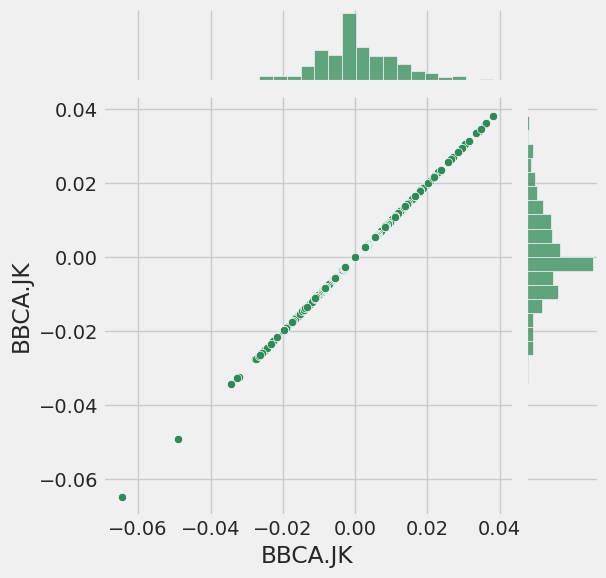

In [362]:
# Comparing BCA to itself should show a perfectly linear relationship.
sns.jointplot(x='BBCA.JK', y='BBCA.JK', data=stk_rets, kind='scatter', color='seagreen')

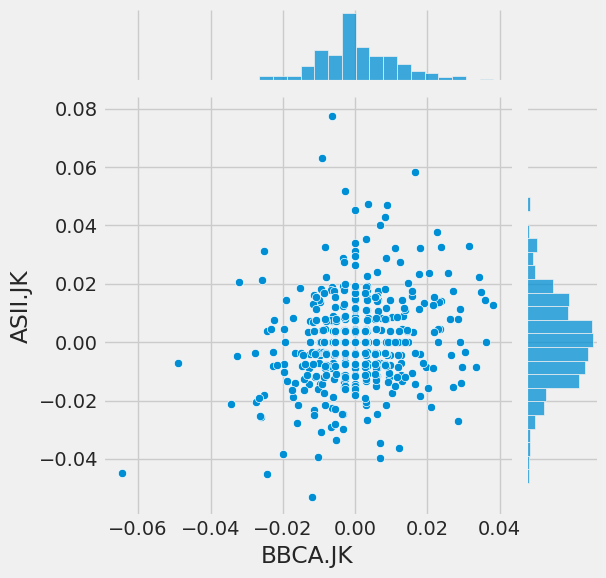

In [363]:
# Use joinplot to compare the daily returns of BCA and ASTRA.
sns.jointplot(x='BBCA.JK', y='ASII.JK', data=stk_rets, kind='scatter')

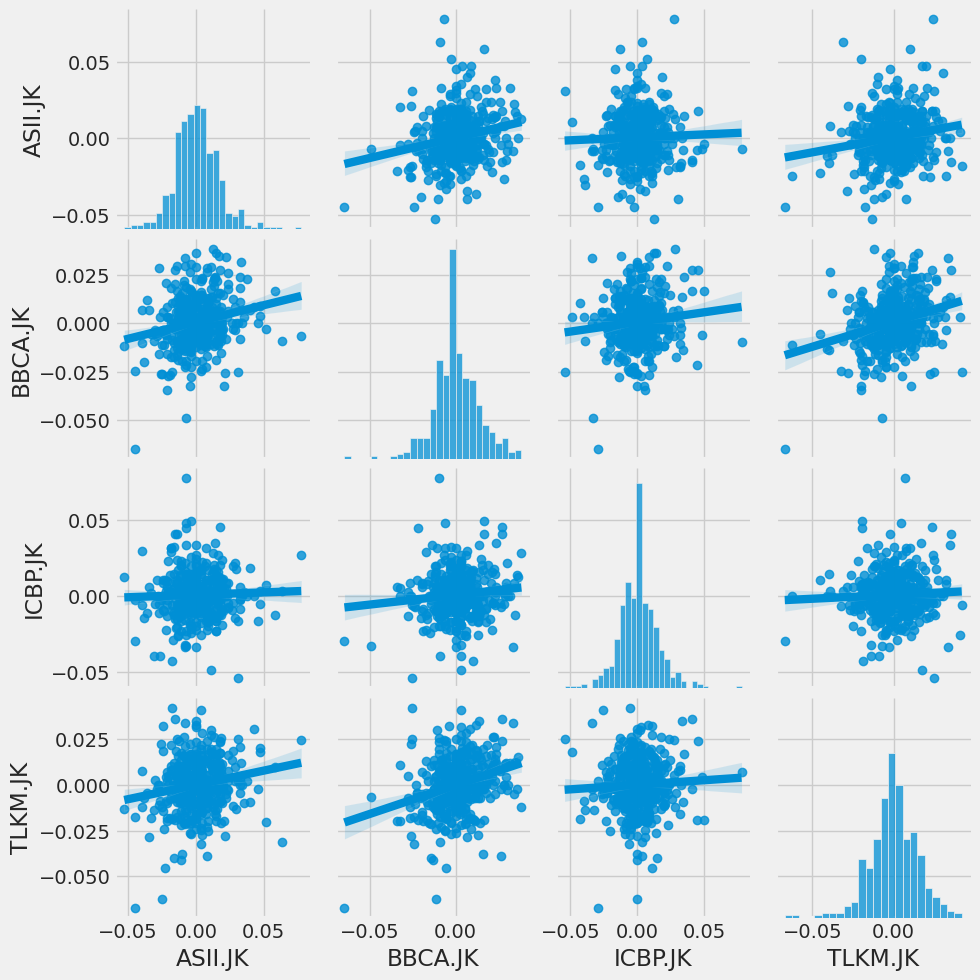

In [364]:
# Use pairplot on our DataFrame for an automatic visual analysis.
sns.pairplot(stk_rets, kind='reg')

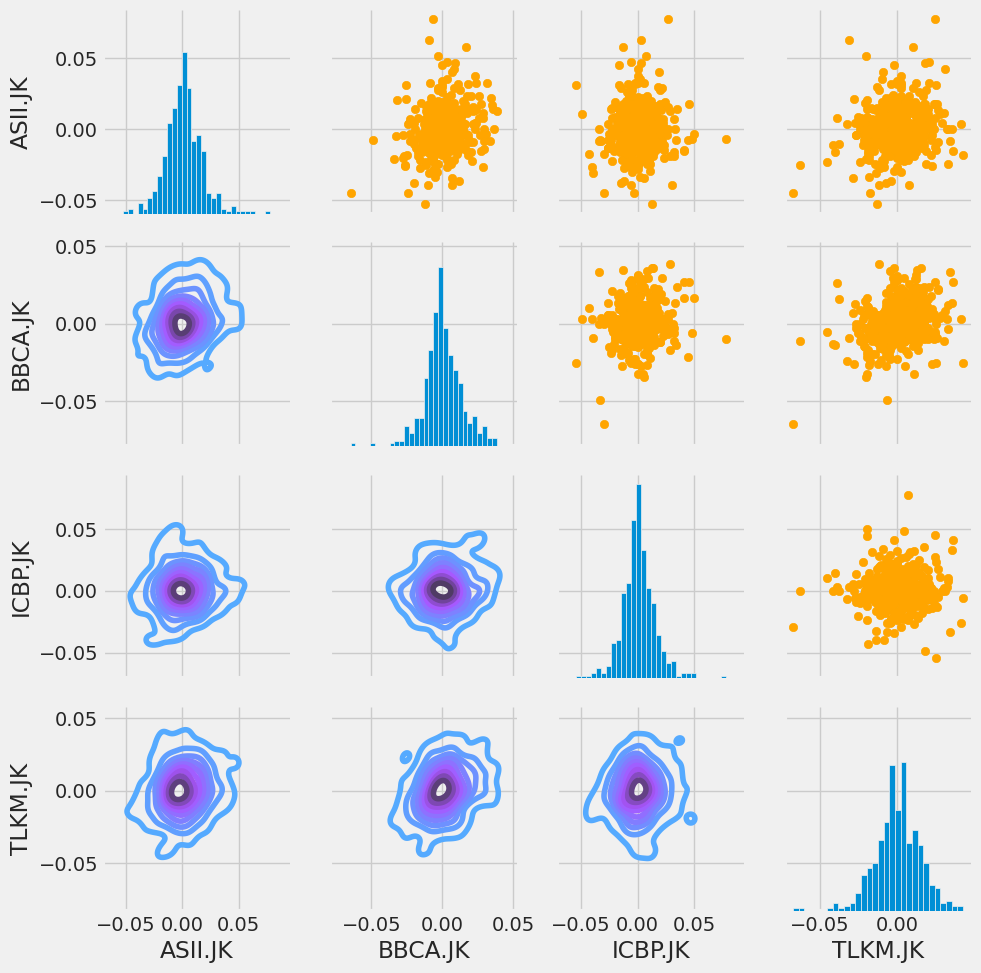

In [365]:
# Set up figure by naming it returns_fig, call PairPLot on the DataFrame.
return_fig = sns.PairGrid(stk_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='orange')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

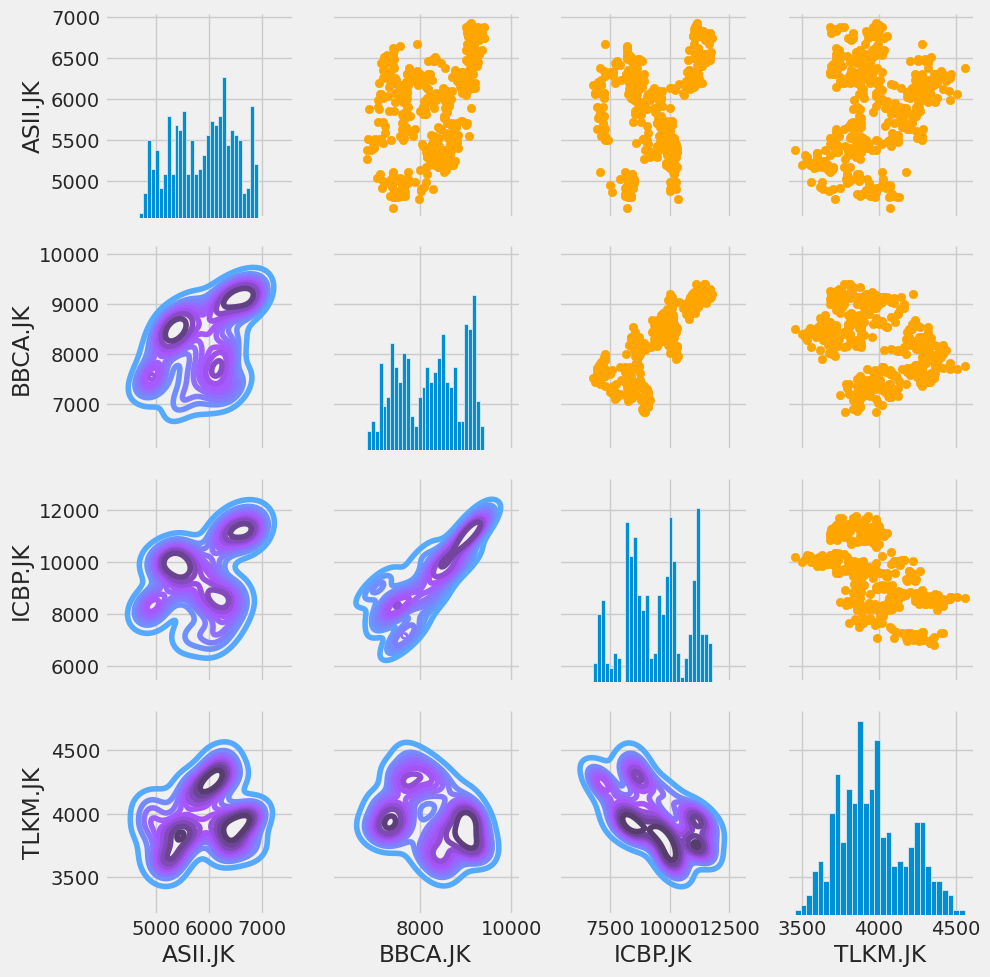

In [366]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame.
returns_fig = sns.PairGrid(closing_stk)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='orange')

# Define the lower triangle in the figure.
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

**Insight :** From the correlation plot above shows that 4 stocks do not have a positive correlation. this is because the stocks are engaged in different fields so that they affect the daily return movement of each stock.


## Risk and Expected Returns

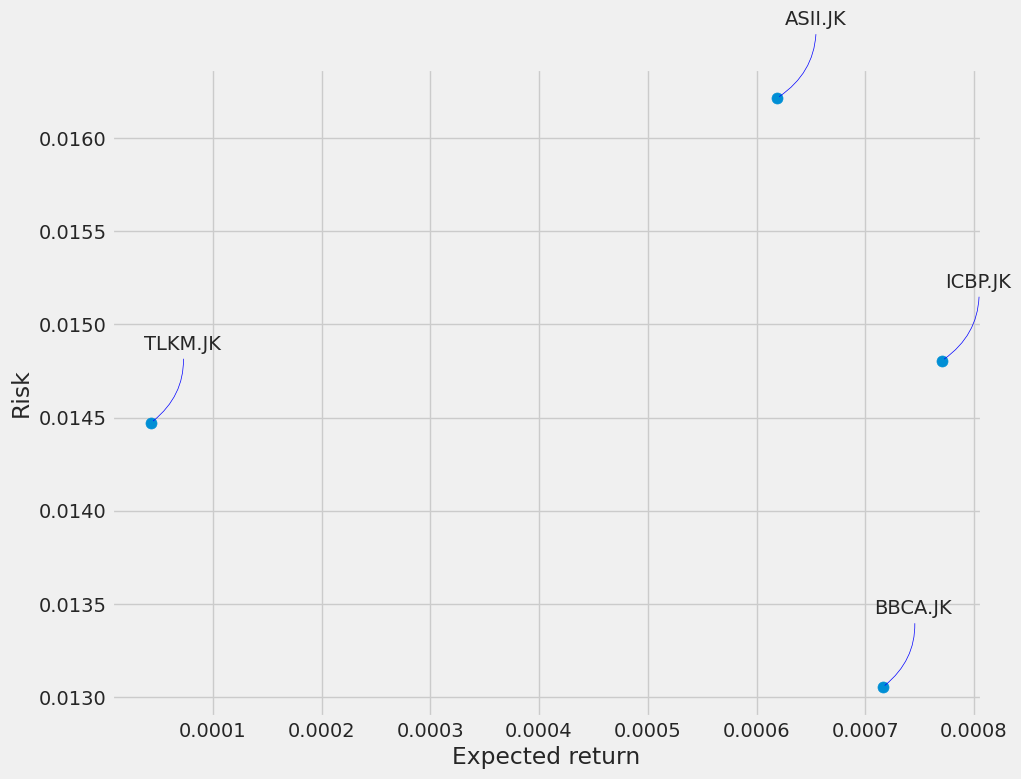

In [367]:
stk = stk_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**Insights :**

**Risk** (lower is better)

**Expected Return** (more to the right is better)


Telkom   : Medium risk and low return.

Astra    : High risk and high return.

BCA      : Low risk and high return.

Indofood : Medium risk and high return.






In [368]:
# Calculate ROI for each stock.
for company, com_name in zip(company_list, company_name):
    initial_price = company.iloc[0]['Adj Close']
    final_price = company.iloc[-1]['Adj Close']

    # Calculate ROI.
    roi = ((final_price - initial_price) / initial_price) * 100

    # Display ROI.
    print(f"ROI for {com_name}: {roi:.2f}%")

ROI for BCA: 30.58%
ROI for TELKOM: -2.58%
ROI for INDOFOOD: 32.28%
ROI for ASTRA: 22.95%


# ARIMA


## Predict Stock Price Using ARIMA Time Series Forecasting

In [369]:
# The Library
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import warnings

In [370]:
# Get the Dataframe BCA from yfinance.
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BBCA.JK',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date",
             "Open",
             "High",
             "Low",
             "Close",
             "Adj Close",
             "Volume"
             ]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date    Open    High     Low   Close  Adj Close     Volume
237 2023-09-26  9000.0  9025.0  8950.0  8950.0     8950.0   73544700
238 2023-09-27  8900.0  9000.0  8875.0  8875.0     8875.0   84345000
239 2023-09-29  8825.0  8900.0  8825.0  8825.0     8825.0  118960000
240 2023-10-02  8900.0  9100.0  8875.0  9075.0     9075.0   93663000
241 2023-10-03  9075.0  9200.0  9025.0  9200.0     9200.0   98380200


I

In [371]:
# Only choose Date and Close column.
data = data[["Date", "Close"]]
print(data.head())

        Date   Close
0 2022-10-04  8550.0
1 2022-10-05  8450.0
2 2022-10-06  8425.0
3 2022-10-07  8200.0
4 2022-10-10  8300.0


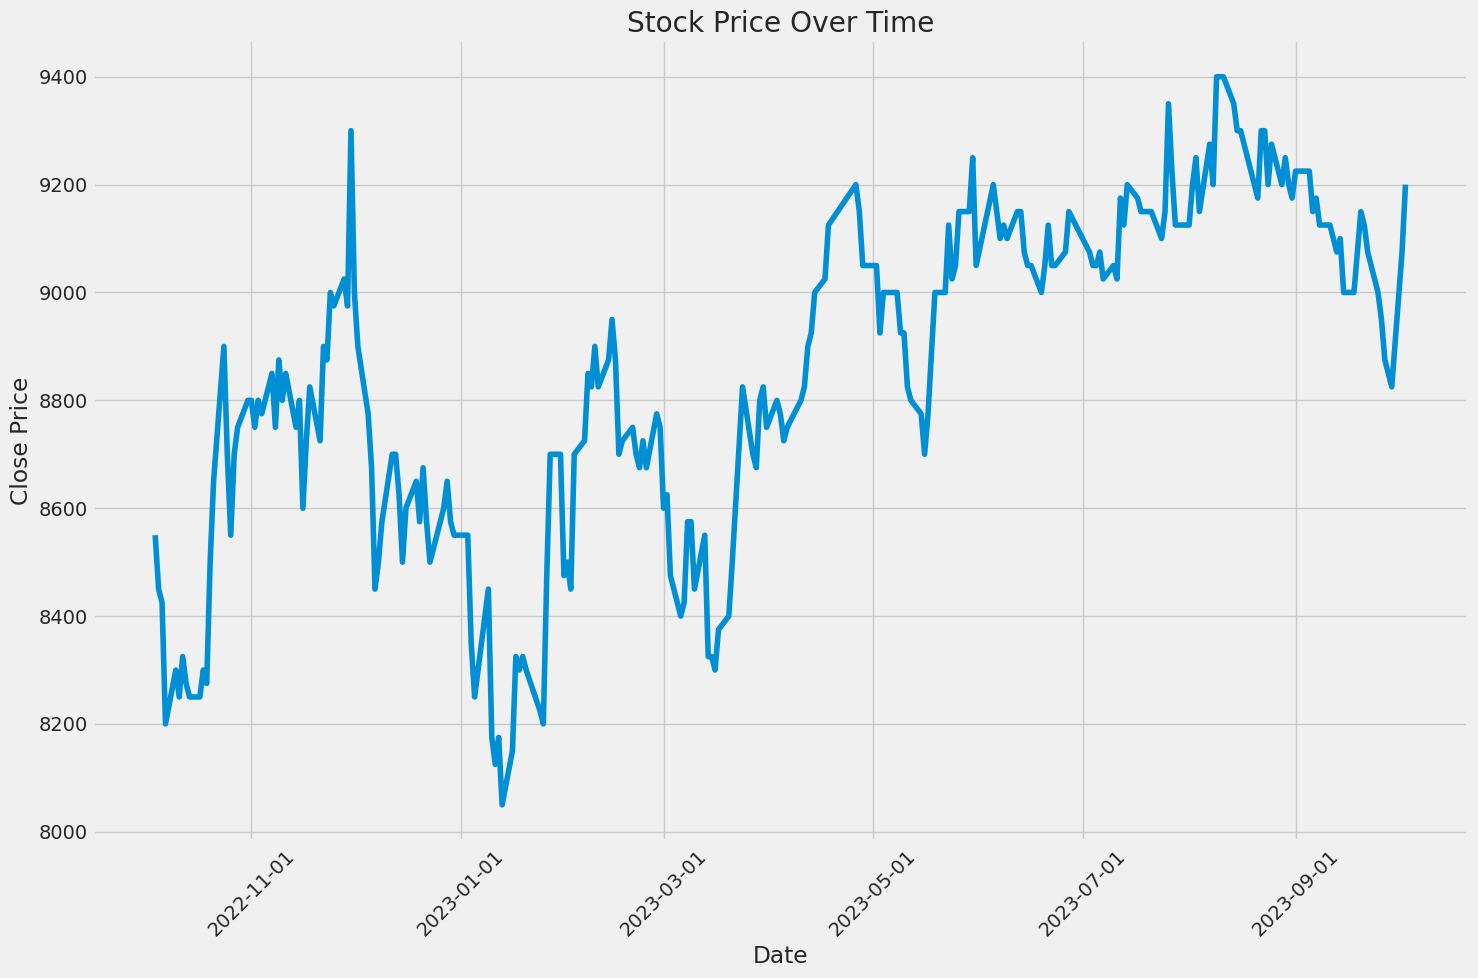

In [372]:
# Plot the data.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))

plt.plot(data["Date"], data["Close"])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

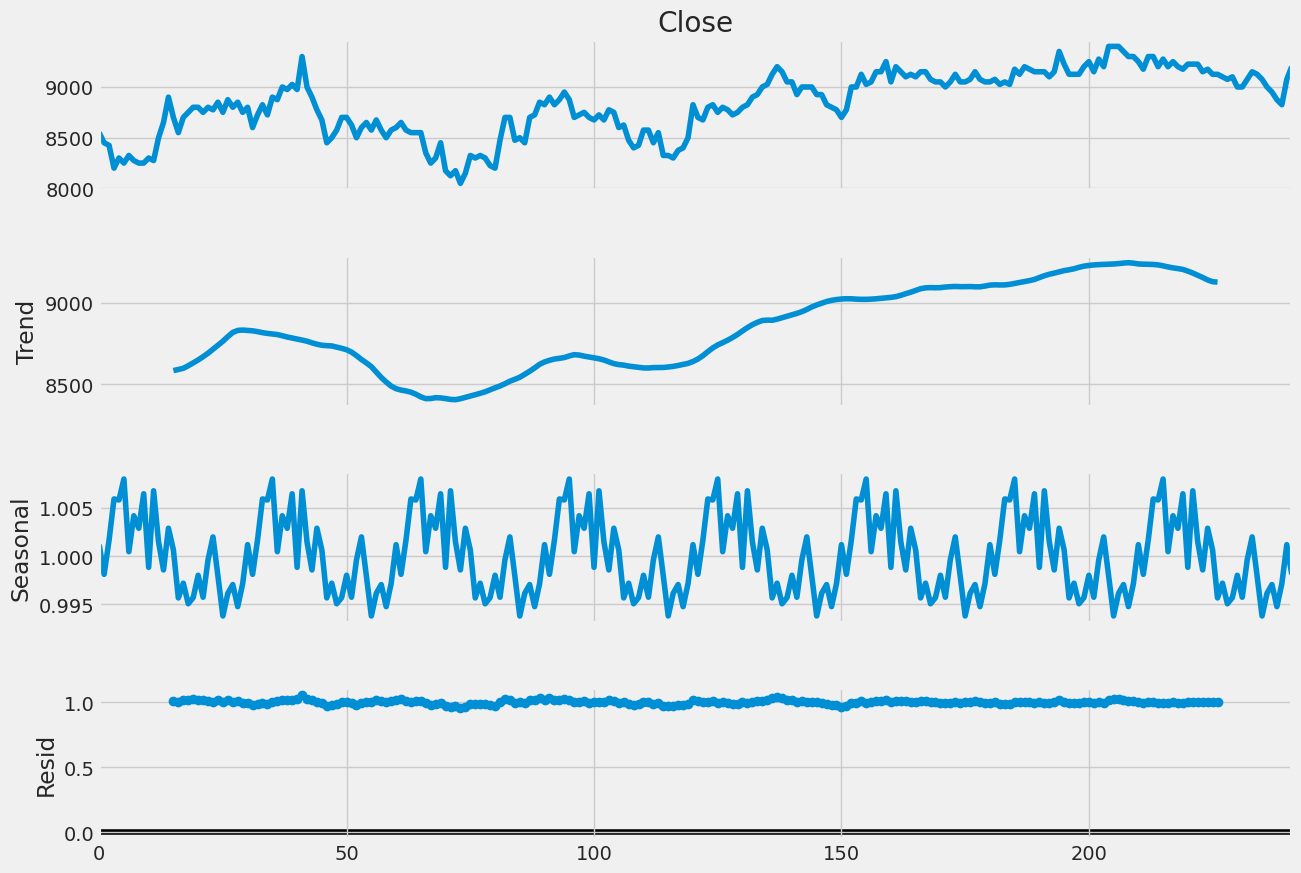

In [373]:
result = seasonal_decompose(data["Close"], model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

Because the data is seasonal then d-value is 1

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

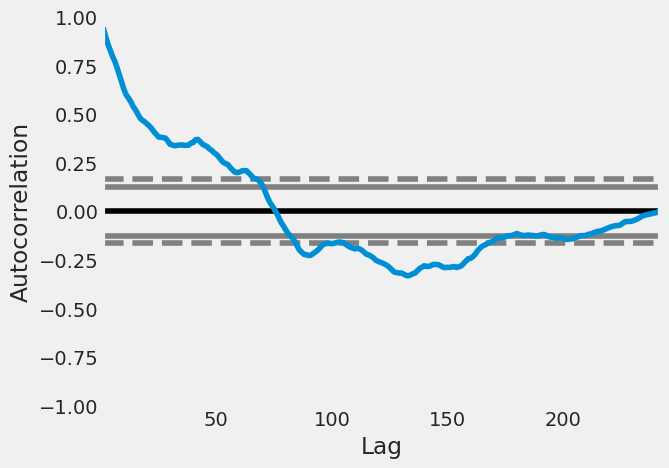

In [374]:
# Find p value using auto correlation plot.
pd.plotting.autocorrelation_plot(data["Close"])

According from auto correlation plot. The curve decreases after the first 6th line. p-value is 6.

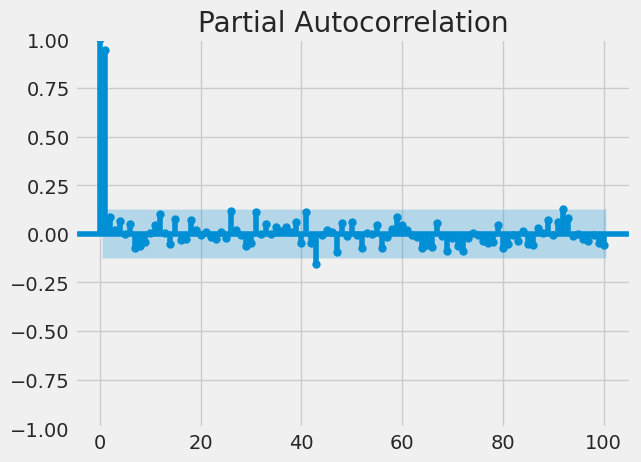

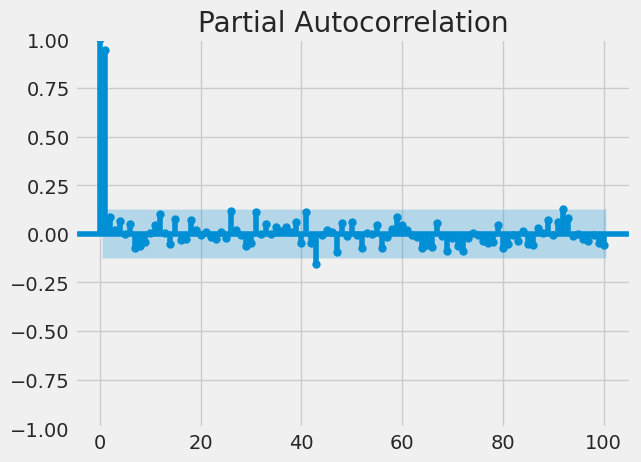

In [375]:
plot_pacf(data["Close"], lags = 100)

According from partial autocorrelation plot, there is only 2 point that is far from all points. q-value is 2

In [376]:
# Import the ARIMA model from the updated module
p, d, q = 6, 1, 2
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  242
Model:                 ARIMA(6, 1, 2)   Log Likelihood               -1443.509
Date:                Wed, 04 Oct 2023   AIC                           2905.019
Time:                        02:20:37   BIC                           2936.382
Sample:                             0   HQIC                          2917.654
                                - 242                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0928      0.070     15.673      0.000       0.956       1.229
ar.L2         -0.8022      0.097     -8.301      0.000      -0.992      -0.613
ar.L3         -0.2027      0.112     -1.812      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [377]:
predictions = fitted.predict()
print(predictions)

0         0.000000
1      8539.573949
2      8460.246824
3      8417.851201
4      8239.414229
          ...     
237    9014.540809
238    8965.421686
239    8898.290576
240    8839.776855
241    9037.937726
Name: predicted_mean, Length: 242, dtype: float64


The predicted values are wrong because the data is seasonal. It is not efficient to use ARIMA if the data is seasonal.

In [378]:
# Using SARIMA model .
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  242
Model:             SARIMAX(6, 1, 2)x(6, 1, 2, 12)   Log Likelihood               -1388.968
Date:                            Wed, 04 Oct 2023   AIC                           2811.936
Time:                                    02:22:08   BIC                           2870.309
Sample:                                         0   HQIC                          2835.485
                                            - 242                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8069      0.116     15.584      0.000       1.580       2.034
ar.L2         -0.7544      0.153   

In [379]:
# Set the prediction for the next 20 days.
predictions = model.predict(len(data), len(data)+20)
print(predictions)

242    9252.669628
243    9207.544039
244    9156.737722
245    9217.214589
246    9180.035509
247    9165.777117
248    9165.184846
249    9148.538165
250    9178.492083
251    9153.013175
252    9218.616792
253    9217.434304
254    9249.187738
255    9240.951708
256    9198.735945
257    9247.445560
258    9180.501468
259    9136.659679
260    9159.792350
261    9174.361906
262    9162.820449
Name: predicted_mean, dtype: float64


<Axes: >

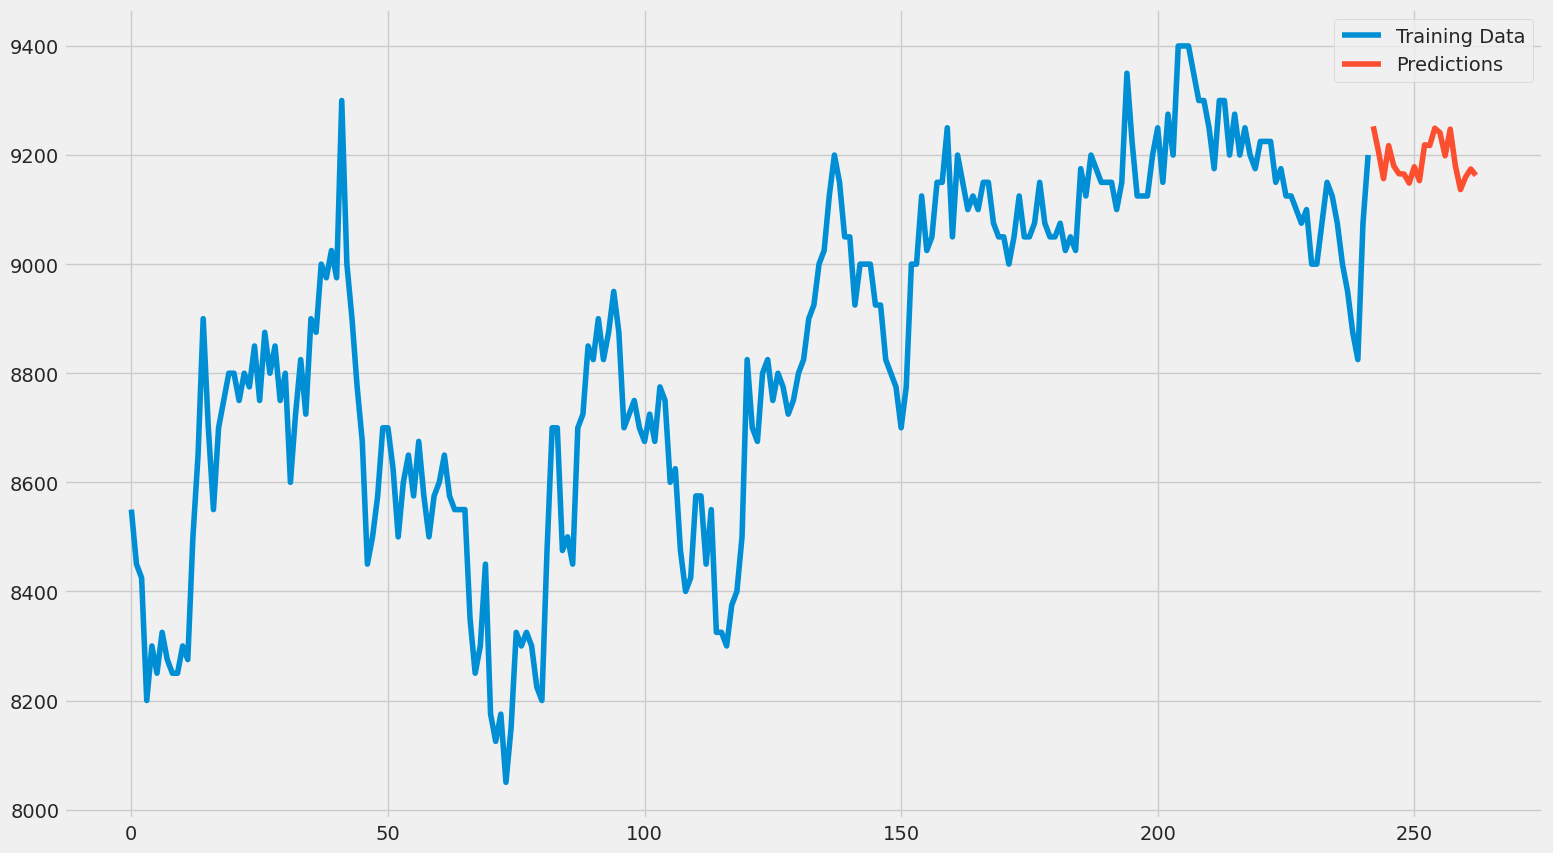

In [380]:
# Create prediction plot.
data["Close"].plot(legend=True, label="Training Data", figsize=(17, 10))
predictions.plot(legend=True, label="Predictions")

This is the final results of modeling predictions using ARIMA Time Series Forecasting. According the prediction plot It can be seen that the stock price fell in Oct 2023.